# 1. Tiền xử lý và chuẩn bị dữ liệu:

## 1.1 Tải dữ liệu

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"D:\Project\Python\Global Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
# Thông tin cơ bản về bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## 1.2 Lọc và trích xuất dữ liệu theo quốc gia được phân công.

In [7]:
# Thông tin về dữ liệu của quốc gia
def info(a):
    """Thông tin về dữ liệu quốc gia được lọc """

    # Tổng số bản ghi
    total_records = len(df)

    # Số bản ghi của quốc gia
    country_records = len(a)
    # Tỷ lệ dữ liệu
    country_percentage = (country_records / total_records) * 100

    print(info.__doc__)
    print(f"Tổng số bản ghi: {total_records}")
    print(f"Số bản ghi của quốc gia: {country_records}")
    print(f"Tỷ lệ dữ liệu: {country_percentage:.2f}%")
    return

In [9]:
# Lọc dữ liệu theo quốc gia Italy
ita = df[df['Country'] == 'Italy']

In [11]:
fiter_ita = info(ita)

Thông tin về dữ liệu quốc gia được lọc 
Tổng số bản ghi: 51290
Số bản ghi của quốc gia: 1108
Tỷ lệ dữ liệu: 2.16%


## 1.3 Xác định và xử lý các giá trị trùng lắp, thiếu, ngoại lai trong phạm vi dữ liệu đã được lọc.

In [13]:
def check(df):
    """Kiểm tra dữ liệu"""
    duplicate_value =  df.duplicated().sum()
    missing_values = df.isnull().sum()

    print(check.__doc__)
    print("Các bản ghi trùng lắp:", duplicate_value)
    print("Giá trị thiếu trong các cột:")
    print(missing_values)
    return

In [15]:
check(ita)

Kiểm tra dữ liệu
Các bản ghi trùng lắp: 0
Giá trị thiếu trong các cột:
Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       1108
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
dtype: int64


In [17]:
# Xử lý dữ liệu thiếu
ita.drop(columns=['Postal Code'], inplace = True)
# Reset index
ita.reset_index(drop = True, inplace = True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_23212\1282361121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ita.drop(columns=['Postal Code'], inplace = True)


In [19]:
ita.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.32,Low
1,17765,IT-2013-1350483,2013-09-05,2013-09-07,Second Class,SB-20290,Sean Braxton,Corporate,Treviso,Veneto,...,TEC-CO-10003800,Technology,Copiers,"Hewlett Wireless Fax, Color",2671.41,7,0.0,534.24,483.04,High
2,15132,ES-2014-5345830,2014-01-14,2014-01-16,First Class,MG-17695,Maureen Gnade,Consumer,Turin,Piedmont,...,TEC-CO-10002663,Technology,Copiers,"Sharp Wireless Fax, Laser",2847.36,8,0.0,711.84,350.68,High
3,12983,ES-2012-5967582,2012-05-28,2012-05-31,First Class,CK-12205,Chloris Kastensmidt,Consumer,Barletta,Apulia,...,TEC-CO-10001413,Technology,Copiers,"Hewlett Wireless Fax, High-Speed",1513.56,4,0.0,741.60,325.45,Critical
4,14311,ES-2013-1525878,2013-11-04,2013-11-06,Second Class,LT-16765,Larry Tron,Consumer,Rome,Lazio,...,OFF-AP-10002321,Office Supplies,Appliances,"Hoover Microwave, Silver",1856.34,6,0.0,909.54,305.25,Critical


In [21]:
# thông tin dữ liệu sau khi đã xử lý
ita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          1108 non-null   int64         
 1   Order ID        1108 non-null   object        
 2   Order Date      1108 non-null   datetime64[ns]
 3   Ship Date       1108 non-null   datetime64[ns]
 4   Ship Mode       1108 non-null   object        
 5   Customer ID     1108 non-null   object        
 6   Customer Name   1108 non-null   object        
 7   Segment         1108 non-null   object        
 8   City            1108 non-null   object        
 9   State           1108 non-null   object        
 10  Country         1108 non-null   object        
 11  Market          1108 non-null   object        
 12  Region          1108 non-null   object        
 13  Product ID      1108 non-null   object        
 14  Category        1108 non-null   object        
 15  Sub-

## 1.4 Chuẩn hoá giá trị chưa phù hợp thành định dạng phù hợp (ngày tháng, tiền tệ...)

In [23]:
def create_features(df):
    df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Quarter'] = df['Order Date'].dt.quarter
    return df

In [25]:
ita_df = create_features(ita.copy())

In [27]:
ita_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Processing Time,Order Year,Order Month,Order Quarter
0,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,7958.58,14,0.0,3979.08,778.32,Low,6,2014,9,3
1,17765,IT-2013-1350483,2013-09-05,2013-09-07,Second Class,SB-20290,Sean Braxton,Corporate,Treviso,Veneto,...,2671.41,7,0.0,534.24,483.04,High,2,2013,9,3
2,15132,ES-2014-5345830,2014-01-14,2014-01-16,First Class,MG-17695,Maureen Gnade,Consumer,Turin,Piedmont,...,2847.36,8,0.0,711.84,350.68,High,2,2014,1,1
3,12983,ES-2012-5967582,2012-05-28,2012-05-31,First Class,CK-12205,Chloris Kastensmidt,Consumer,Barletta,Apulia,...,1513.56,4,0.0,741.60,325.45,Critical,3,2012,5,2
4,14311,ES-2013-1525878,2013-11-04,2013-11-06,Second Class,LT-16765,Larry Tron,Consumer,Rome,Lazio,...,1856.34,6,0.0,909.54,305.25,Critical,2,2013,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,16913,ES-2013-4686025,2013-06-19,2013-06-21,First Class,SB-20185,Sarah Brown,Consumer,Tivoli,Lazio,...,24.75,3,0.0,10.62,0.53,Critical,2,2013,6,2
1104,17111,ES-2013-3496655,2013-05-30,2013-06-04,Standard Class,JB-15400,Jennifer Braxton,Corporate,Viterbo,Lazio,...,9.78,2,0.0,2.34,0.51,Medium,5,2013,5,2
1105,10354,ES-2013-4569090,2013-08-29,2013-09-03,Standard Class,GA-14725,Guy Armstrong,Consumer,Rome,Lazio,...,30.15,3,0.0,14.76,0.35,Medium,5,2013,8,3
1106,13611,ES-2014-3846644,2014-09-22,2014-09-25,First Class,MH-18025,Michelle Huthwaite,Consumer,Acireale,Sicily,...,67.86,2,0.0,7.44,0.29,Medium,3,2014,9,3


# 2. Mô tả dữ liệu:


## 2.1 Tổng quan thị trường

In [29]:
def tong_quan(df):
    """Tổng quan thị trường"""
    print(tong_quan.__doc__)

    sl_dh = df.groupby('Order ID').size().sum() #tổng số đơn hàng
    sl_kh = df['Customer ID'].nunique() #tổng số khách hàng

    tong_dt = df['Sales'].sum() #tổng doanh thu
    tong_ln = df['Profit'].sum() #tổng lợi nhuận

    tgtb_dh = df['Processing Time'].mean() #thời gian xử lý đơn hàng trung bình

    fre_ship_mode = df['Ship Mode'].mode()[0] #hình thức vận chuyển (ship mode) xuất hiện nhiều nhất
    fre_order_priority = df['Order Priority'].mode()[0] #Order piority xuất hiện nhiều nhất

    print(f"Số lương đơn hàng đã đặt: {sl_dh}")
    print(f"Số khách hàng: {sl_kh}")
    print(f"Tổng doanh thu: {tong_dt}")
    print(f"Tổng lợi nhuận: {tong_ln}")
    print(f"Thời gian trung bình xử lý đơn hàng: {tgtb_dh}")
    print(f"Ship mode xuất hiện nhiều nhất: {fre_ship_mode}")
    print(f"Order priority xuất hiện nhiều nhất: {fre_order_priority}")
    return

In [31]:
overview = tong_quan(ita_df)

Tổng quan thị trường
Số lương đơn hàng đã đặt: 1108
Số khách hàng: 376
Tổng doanh thu: 289709.658
Tổng lợi nhuận: 19828.757999999994
Thời gian trung bình xử lý đơn hàng: 4.007220216606498
Ship mode xuất hiện nhiều nhất: Standard Class
Order priority xuất hiện nhiều nhất: Medium


## 2.2 Các phân tích thống kê cơ bản

### 2.2.1 Phân tích các chỉ số kinh doanh theo danh mục sản phẩm (Category)

In [33]:
def analyze_business_category_metrics(df):
    """Phân tích các chỉ số kinh doanh theo danh mục (category)"""
    print(analyze_business_category_metrics.__doc__)

    #Tính tổng doanh số, lợi nhuận, số lượng và giảm giá trung bình
    category_metrics = df.groupby('Category').agg({'Sales': 'sum',
                                                   'Profit': 'sum',
                                                   'Quantity': 'sum',
                                                   'Discount': 'mean'})
    #Tính tỷ lệ lợi nhuận
    category_metrics['Profit ratio'] = (category_metrics['Profit'] / category_metrics['Sales']) * 100
    return category_metrics

In [35]:
category_analysis = analyze_business_category_metrics(ita_df)
print(category_analysis)

Phân tích các chỉ số kinh doanh theo danh mục (category)
                      Sales     Profit  Quantity  Discount  Profit ratio
Category                                                                
Furniture         72017.604   2187.954       578  0.212258      3.038082
Office Supplies  119213.778  17999.898      2804  0.084718     15.098840
Technology        98478.276   -359.094       744  0.200966     -0.364643


In [37]:
# Phân tích danh mục sub category
def analyze_business_sub_category(df):
    """Phân tích các chỉ số kinh doanh theo danh mục phụ (sub-category)"""
    print(analyze_business_sub_category.__doc__)
    #Tính tổng doanh số, lợi nhuận, số lượng và giảm giá trung bình
    subcategory_profit = df.groupby([df['Category'],'Sub-Category']).agg({'Sales':'sum',
                                                                          'Profit' : 'sum',
                                                                          'Quantity' : 'sum',
                                                                         'Discount' : 'mean'})
    return subcategory_profit

In [39]:
subcategory_analysis = analyze_business_sub_category(ita_df)
print(subcategory_analysis)

Phân tích các chỉ số kinh doanh theo danh mục phụ (sub-category)
                                  Sales     Profit  Quantity  Discount
Category        Sub-Category                                          
Furniture       Bookcases     42425.820  11596.560       191       0.0
                Chairs         8068.164  -6360.546       157       0.6
                Furnishings   11140.710   2763.630       187       0.0
                Tables        10382.910  -5811.690        43       0.5
Office Supplies Appliances    36520.200  12721.470       108       0.0
                Art           19468.620   4600.050       601       0.0
                Binders       11310.150   2893.500       529       0.0
                Envelopes      5515.770   1395.660       196       0.0
                Fasteners      1984.890    578.340       145       0.0
                Labels         2131.260    486.510       226       0.0
                Paper          6174.300   1512.810       231       0.0
            

### 2.2.2 Phân tích các chỉ số kinh doanh theo phân khúc (segment)


In [41]:
def analyze_business_segment_metrics(df):
    """Phân tích các chỉ số kinh doanh theo phân khúc khách hàng (segment)"""
    print(analyze_business_segment_metrics.__doc__)

    #Tính tổng doanh số, lợi nhuận
    segment_metrics = df.groupby('Segment').agg({'Sales': 'sum',
                                             'Profit': 'sum'})
    #Số lượng khách hàng theo từng phân khúc
    segment_metrics['Total customer'] = df.groupby('Segment')['Customer ID'].nunique()
    
    return segment_metrics

In [43]:
segment_analysis = analyze_business_segment_metrics(ita_df)
print(segment_analysis)

Phân tích các chỉ số kinh doanh theo phân khúc khách hàng (segment)
                  Sales    Profit  Total customer
Segment                                          
Consumer     146703.813  9532.053             188
Corporate    100022.241  6746.481             124
Home Office   42983.604  3550.224              64


### 2.2.3 Phân tích các chỉ số kinh doanh theo ship mode

In [45]:
def analyze_business_ship_mode_metrics(df):
    """Phân tích các chỉ số kinh doanh theo hình thức vận chuyển (ship mode)"""
    print(analyze_business_ship_mode_metrics.__doc__)

    #Tính tổng doanh số, lợi nhuận, chi phí vận chuyển trb và thời gian xử lý trb cũa từng hình thức vận chuyển
    shipmode_metrics = df.groupby('Ship Mode').agg({'Sales': 'sum',
                                                    'Profit': 'sum', 
                                                    'Shipping Cost' : 'mean', 
                                                    'Processing Time': 'mean'})

    #Số lượng đơn hàng đã đặt theo từng hình thức shipmode
    shipmode_metrics['Total order'] = df.groupby('Ship Mode')['Order ID'].nunique()
    
    return shipmode_metrics

In [47]:
shipmode_analysis = analyze_business_ship_mode_metrics(ita_df)
print(shipmode_analysis)

Phân tích các chỉ số kinh doanh theo hình thức vận chuyển (ship mode)
                     Sales     Profit  Shipping Cost  Processing Time  \
Ship Mode                                                               
First Class      41779.956   3620.886      36.791167         2.266667   
Same Day          8900.568   1897.758      48.325588         0.000000   
Second Class     58255.716    149.886      31.968524         2.923810   
Standard Class  180773.418  14160.228      21.917544         4.997076   

                Total order  
Ship Mode                    
First Class              95  
Same Day                 21  
Second Class            109  
Standard Class          323  


### 2.2.4 Phân tích các chỉ số kinh doanh theo Order Priority

In [49]:
def analyze_business_order_priority_metrics(df):
    """Phân tích các chỉ số kinh doanh theo phân khúc khách hàng (segment)"""
    print(analyze_business_order_priority_metrics.__doc__)

    #Tính tổng doanh số, lợi nhuận
    order_priority_metrics = df.groupby('Order Priority').agg({'Sales': 'sum',
                                                               'Profit': 'sum',
                                                              'Shipping Cost': 'mean',
                                                              'Processing Time' : 'mean'})
    return order_priority_metrics

In [51]:
order_priority_analysis = analyze_business_order_priority_metrics(ita_df)
print(order_priority_analysis)

Phân tích các chỉ số kinh doanh theo phân khúc khách hàng (segment)
                     Sales    Profit  Shipping Cost  Processing Time
Order Priority                                                      
Critical         20228.862  1667.622      50.276044         1.824176
High             86180.262  6168.282      33.723413         3.098802
Low              27015.600  4631.730      38.640685         6.452055
Medium          156284.934  7361.124      18.542557         4.537705


# 3. Trực quan hoá dữ liệu:

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Xu hướng theo thời gian của doanh số, lợi nhuận theo tháng

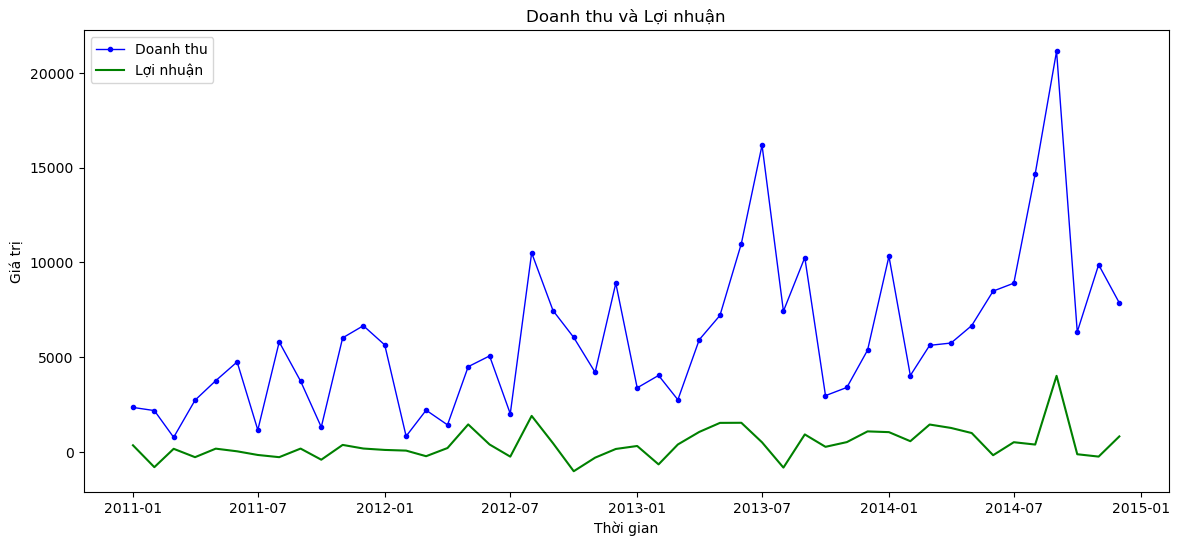

In [54]:
# xu hướng theo thời gian của thị trường (doanh số, lợi nhuận, theo tháng) 
sale = ita_df.groupby(ita_df['Order Date'].dt.to_period('M'))['Sales'].sum()
profit = ita_df.groupby(ita_df['Order Date'].dt.to_period('M'))['Profit'].sum()
# Chuyển đổi chỉ số thành dạng timestamp để vẽ biểu đồ
x = sale.index.to_timestamp()

plt.figure(figsize=(14, 6))  
plt.plot(x, sale, label='Doanh thu', color = 'blue', marker='o', markersize=3, linewidth= 1) 
plt.plot(x, profit, label='Lợi nhuận', color = 'green') 
plt.title('Doanh thu và Lợi nhuận')
plt.xlabel('Thời gian') 
plt.ylabel('Giá trị')
plt.legend()
plt.show()

## 3.2 Phân tích doanh thu các danh mục 

### Doanh thu các danh mục qua các năm 

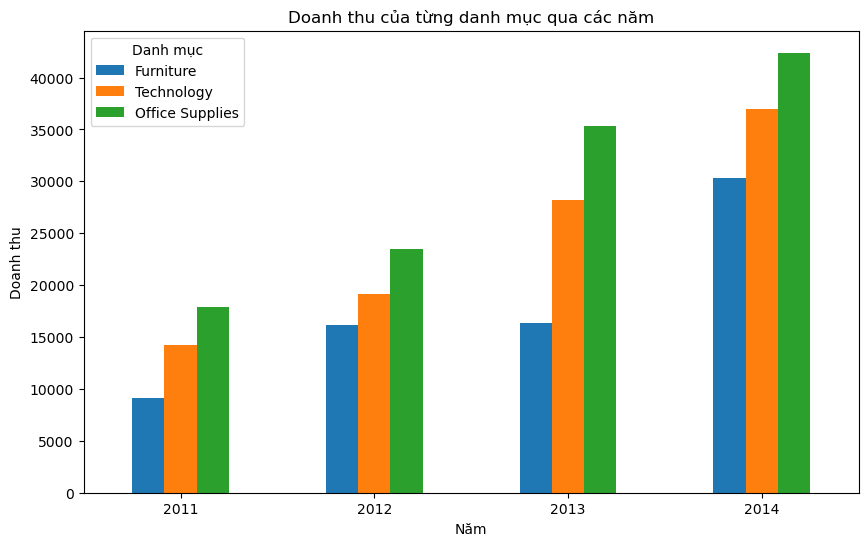

In [57]:
# Sale của category theo năm
category_by_year = ita_df.groupby([ita_df['Order Year'],'Category'])['Sales'].sum()
sale_by_year = pd.DataFrame(category_by_year) # đưa về dataframe
df_reset = sale_by_year.reset_index(level='Category') # reset lại index
# pivot bảng sắp xếp, vẽ biểu đồ 
df_pivot = df_reset.pivot(columns='Category', values='Sales') 
total_sales_per_category = df_pivot.sum().sort_values()
df_pivot = df_pivot[total_sales_per_category.index]
# Điều chỉnh kích thước figure trước khi vẽ
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=False, ax=plt.gca())   
plt.title('Doanh thu của từng danh mục qua các năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.xticks(rotation=0)
plt.legend(title='Danh mục') 
plt.show()

### Top 10 doanh thu của các danh mục phụ (sub_category)

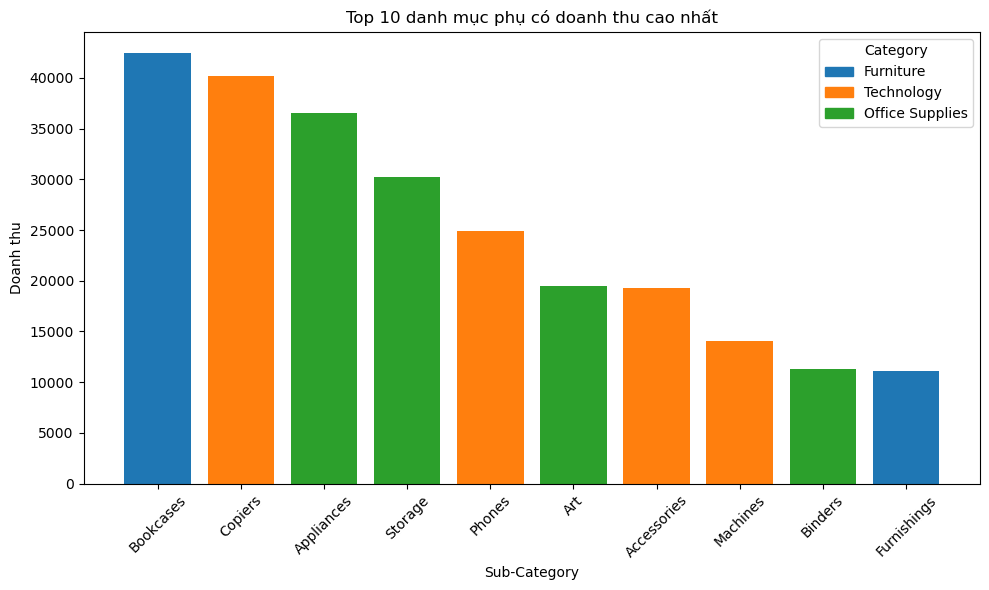

In [57]:
#Top 10 doanh thu của các danh mục phụ (sub_category)
sale_sub_category = ita_df.groupby([ita_df['Category'],'Sub-Category'])['Sales'].sum()
sale_sub_category = pd.DataFrame(sale_sub_category) # đưa về dataframe
sub_category = sale_sub_category.reset_index()
sub_category = sub_category.sort_values(by='Sales', ascending=False) #sắp xếp dữ liệu
sub_category=sub_category.reset_index(drop=True)
sub = sub_category.head(10) # lấy top 10 danh thu cao nhất

# Xác định màu sắc theo mỗi Category
mau = {'Furniture': 'tab:blue', 'Technology': 'tab:orange', 'Office Supplies': 'tab:green'}
# Tạo list màu sắc cho từng sub-category dựa trên Category của nó
colors = [mau[i] for i in sub['Category']]
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(sub['Sub-Category'], sub['Sales'], color=colors)
plt.xlabel('Sub-Category')
plt.ylabel('Doanh thu')
plt.title('Top 10 danh mục phụ có doanh thu cao nhất')
plt.xticks(rotation=45)
plt.tight_layout()

# Tạo legend tùy chỉnh
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in mau.values()]
labels = list(mau.keys())
plt.legend(handles, labels, title='Category')
plt.show()

Ở nước Italy qua các năm thì doanh thu các danh mục đều tăng, trong đó danh mục Office Supplies chiếm doanh thu lớn qua các năm, 
tiếp đó là Technolygy và Furniture thì có doanh thu chiếm ít hơn so với 2 danh mục còn.

## 3.3 Top 5 các state có doanh thu cao nhất, so sánh các chỉ số giữa các State

### So sánh top 5 các state có doanh thu cao nhất

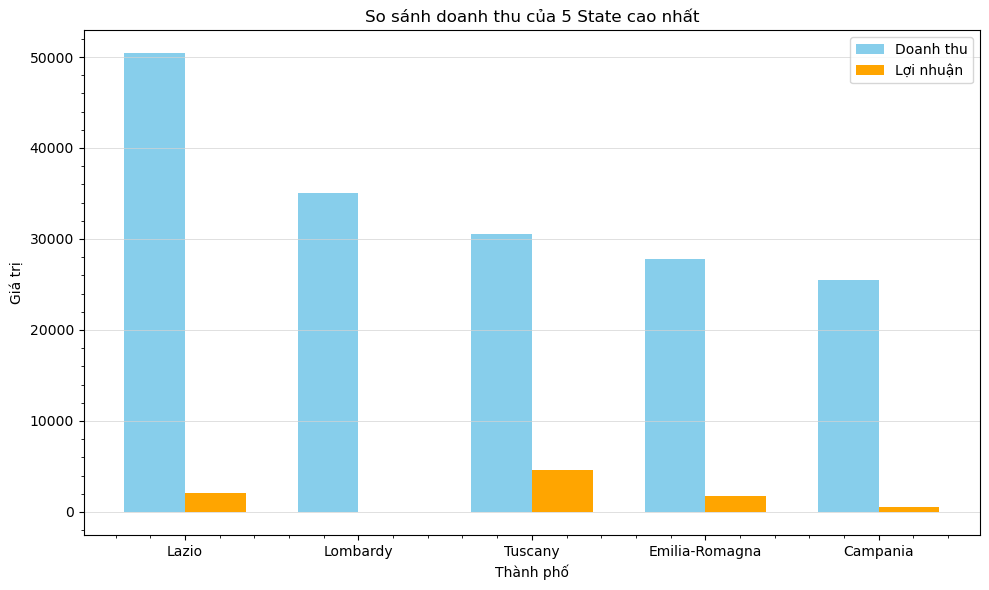

In [59]:
#So sánh top 5 các state có doanh thu cao nhất
sales_by_state = ita_df.groupby('State').agg({'Sales': 'sum','Profit': 'sum','Shipping Cost': 'mean', 'Processing Time': 'mean'})
#Sắp xếp và lấy 5 doanh thu cao nhất
sales_sort = sales_by_state.sort_values(by='Sales', ascending=False)
top_5_sales = sales_sort['Sales'].head(5)
#Tìm lợi nhuận tương ứng với 5 giá trị doanh thu 
top_5_profit = sales_sort.loc[top_5_sales.index, 'Profit']
#Thiết lập vị trí các cột trên trục x
x = np.arange(len(top_5_sales))
width = 0.35  # Độ rộng của mỗi cột
#Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2,top_5_sales, width, label='Doanh thu', color='skyblue')
rects2 = ax.bar(x + width/2, top_5_profit, width, label='Lợi nhuận', color='orange')

#Thêm nhãn và tiêu đề
ax.set_ylabel('Giá trị')
ax.set_xlabel('Thành phố')
ax.set_title('So sánh doanh thu của 5 State cao nhất')
ax.set_xticks(x)
ax.set_xticklabels(top_5_sales.index)
ax.legend()
ax.legend()
plt.minorticks_on()
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

Doanh thu của state Lazio cao nhất, tiếp đó là state Lombardy tuy nhiên lợi nhuận của bang này thấp nhất so với 4 bang còn lại. Lợi nhuận của bang 
Tuscany cao nhất và doanh thu của bang này cũng đứng ở vị trí thứ 3.

### So sánh chi phí vận chuyển và thời gian xử lý đơn hàng của top 5 state

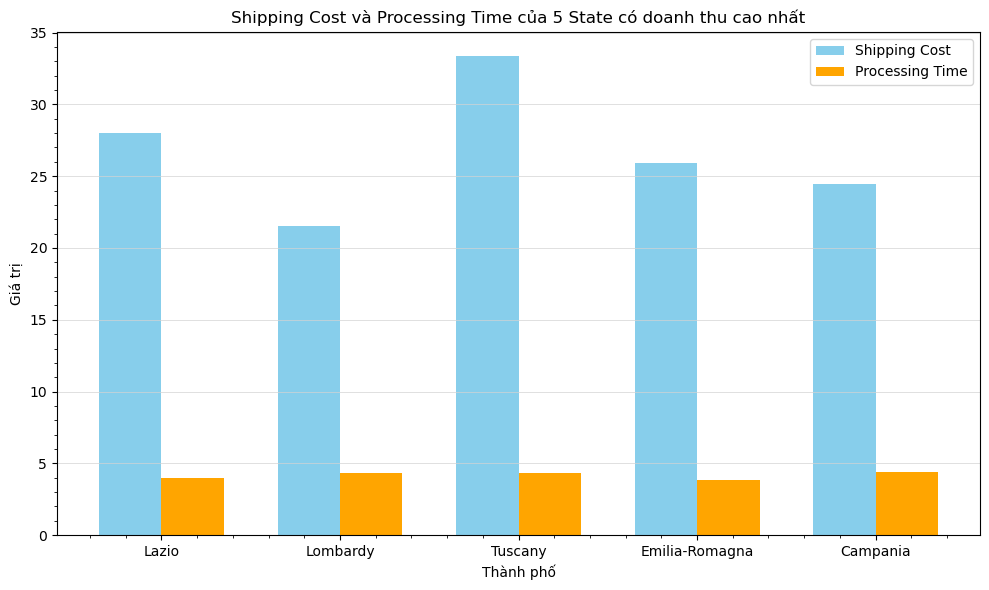

In [61]:
# Tìm ship cost, processing time tương ứng của 5 state phân tích ở trên
ship_by_state = sales_sort.loc[top_5_sales.index, 'Shipping Cost']
process_by_state = sales_sort.loc[top_5_sales.index, 'Processing Time']
# Thiết lập vị trí các cột trên trục x
x = np.arange(len(top_5_sales))
width = 0.35  # Độ rộng của mỗi cột
# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2,ship_by_state, width, label='Shipping Cost', color='skyblue')
rects2 = ax.bar(x + width/2, process_by_state, width, label='Processing Time', color='orange')

# Thêm nhãn và tiêu đề
ax.set_ylabel('Giá trị')
ax.set_xlabel('Thành phố')
ax.set_title('Shipping Cost và Processing Time của 5 State có doanh thu cao nhất')
ax.set_xticks(x)
ax.set_xticklabels(top_5_sales.index)
ax.legend()
plt.minorticks_on()
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

- Thời gian xử lý đơn hàng trung bình các bang đều dưới 5 ngày (processing time), trong đó bang Lazio và bang Emilia-Romagna có thời gian xử lý đơn hàng trung bình thấp hơn so với các bang còn lại. 
- Chi phí vận chuyển của bang Tuscany cao nhất trong các bang, bên cạnh đó bang này có doanh thu đạt top 3 và lợi nhuận cao nhất trong các bang (kết quả biểu đồ đã phân tích) có thể thấy bang Tuscany có tiềm năng phát triển doanh số bán hàng tuy nhiên chi phí khá cao cần tối ưu hóa chi phí vận chuyển lựa chọn nhà cung cấp dịch vụ vận chuyển cho bang, ngoài ra thời gian xử lý đơn hàng trb của bang cũng cao hơn so với các bang khác, do đó nên xem xét lại chi phí và thời gian xử lý đơn hàng ở bang cũng như cân nhắc các khía cạnh khác về số khách hàng hoặc số lượng mua hàng của bang này để đánh giá phù hợp nếu lựa chọn phát triển thị trường ở đây trong tương lai.
- Ngoài ra bang Lazio có chi phí vận chuyển trb cao vị trí thứ 2 tuy nhiên thời gian xử lý đơn hàng trb lại thấp hơn so với các bang còn lại và doanh thu của Lazion cũng rất tích cực nên có thể xem xét tối ưu hóa chi phí vận chuyển và tiếp tục duy trì thời gian xử lý đơn hàng nhanh chóng để tạo trải nghiệm tốt cho khách hàng

## 3.4 Phân tích doanh thu và số lượng khách hàng theo phân khúc 

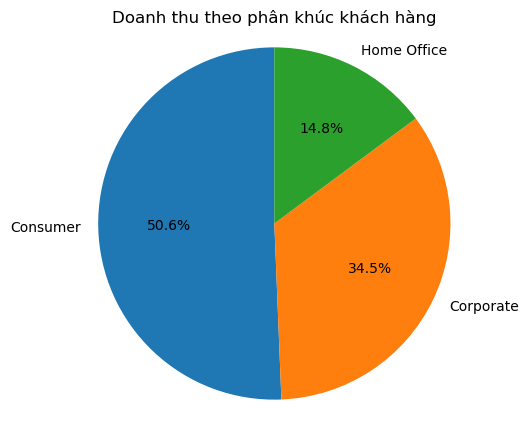

In [63]:
# Doanh thu theo phân khúc khách hàng
plt.figure(figsize=(5,5))
plt.pie(segment_analysis['Sales'], labels=segment_analysis.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Doanh thu theo phân khúc khách hàng')
plt.show()

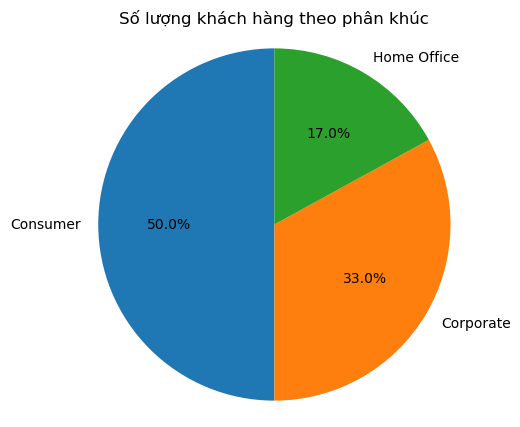

In [67]:
# Số lượng khách hàng theo phân khúc
plt.figure(figsize=(5,5))
plt.pie(segment_analysis['Total customer'], labels=segment_analysis.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Số lượng khách hàng theo phân khúc')
plt.show()

# 4 Phân tích và đưa ra một số đề xuất cụ thể

In [98]:
# Nhận xét về category
print(category_analysis)

                      Sales     Profit  Quantity  Discount  Profit ratio
Category                                                                
Furniture         72017.604   2187.954       578  0.212258      3.038082
Office Supplies  119213.778  17999.898      2804  0.084718     15.098840
Technology        98478.276   -359.094       744  0.200966     -0.364643


- Danh mục Office supplies có doanh thu và lợi nhuận cao nhất đồng thời có discount ít hơn các danh mục khác, đối với danh mục Technology mặc dù doanh thu và số lượng bán ra cao hơn so với Furniture nhưng lợi nhuận âm và tỷ lệ discount cũng gần với danh mục Furniture

In [108]:
# Nhận xét về subcategory
print(subcategory_analysis)

                                  Sales     Profit  Quantity  Discount
Category        Sub-Category                                          
Furniture       Bookcases     42425.820  11596.560       191       0.0
                Chairs         8068.164  -6360.546       157       0.6
                Furnishings   11140.710   2763.630       187       0.0
                Tables        10382.910  -5811.690        43       0.5
Office Supplies Appliances    36520.200  12721.470       108       0.0
                Art           19468.620   4600.050       601       0.0
                Binders       11310.150   2893.500       529       0.0
                Envelopes      5515.770   1395.660       196       0.0
                Fasteners      1984.890    578.340       145       0.0
                Labels         2131.260    486.510       226       0.0
                Paper          6174.300   1512.810       231       0.0
                Storage       30261.528  -7478.442       589       0.4
      

- Danh mục Furniture: Các sản phẩm của danh mục sub-category có bookcase chiếm ưu thế với danh thu, lợi nhuận và số lượng sản phẩm bán ra cao nhất. Đối với danh mục phụ Furnishings cũng mang lại doanh thu và số lượng bán khá cao tuy nhiên lợi nhuận cũng ở mức ổn, còn danh mục Tables và Chair mặc dù có mang lại doanh thu tuy nhiên lợi nhuận của 2 danh mục này lại âm đặc biệt cả 2 danh mục này có tỷ lệ discount trung bình từ 0.5 trở lên.
- Danh mục Offices Supplies: Các danh mục mang lại doanh thu và lợi nhuận cao như là Appliances, Art, đặc biệt danh mục Art có số lượng bán cao nhất. Các danh mục còn lại thì doanh thu và lợi nhuận tương đối ổn, tuy nhiên đối với danh mục Storage mặc dù doanh thu và số lượng bán khá cao nhưng lợi nhuận lại âm và danh mục này cũng có tỷ lệ discount trung bình là 0.4
- Danh mục Technology: Tương tự các danh mục khác thì các danh mục như Accessories, Copiers có doanh thu và lợi nhuận khá cao còn danh mục Machines và Phones doanh thu cao nhưng lợi nhuận âm và cũng có tỷ lệ discount trung bình là 0.4
- => Nhìn chung các danh mục có tỷ lệ discount >= 0.4 thì có lợi nhuận âm mặc dù doanh dương, do đó cần xem xét lại tỷ lệ giảm giá của các sản phẩm này cũng như tìm hiểu xem các nguyên nhân khác ảnh hưởng đến việc lợi nhuận âm

In [104]:
# Nhận xét về segment
segment_analysis

,Sales,Profit,Total customer
Segment,,,
Consumer,146703.813,9532.053,188
Corporate,100022.241,6746.481,124
Home Office,42983.604,3550.224,64


- Phân khúc khách hàng consumer mang lại lợi nhuận và doanh thu là chủ yếu, đây cũng là phân khúc chiếm nhiều khách hàng nhất, tiếp đó là phân khúc corporate và home office => doanh thu chủ yếu đến từ người tiêu dùng và doanh nghiệp

In [100]:
# Nhận xét về shipmode
shipmode_analysis

,Sales,Profit,Shipping Cost,Processing Time,Total order
Ship Mode,,,,,
First Class,41779.956,3620.886,36.791167,2.266667,95
Same Day,8900.568,1897.758,48.325588,0.000000,21
Second Class,58255.716,149.886,31.968524,2.923810,109
Standard Class,180773.418,14160.228,21.917544,4.997076,323


- Có 4 hình thức vận chuyển trong đó chủ yếu là standard class được sử dụng nhiều nhất, đây là hình thức vận chuyển cơ bản được khách hàng sử dụng nhiều vì chi phí vận chuyển trung bình không quá cao tuy nhiên thời gian xử lý trung bình thì lâu hơn so với các hình thức còn lại. Đối với hình thức vận chuyển same day thì thời gian xử lý trong ngày và chi phí vận chuyển khá cao nên ít được sử dụng hơn. Đối với 2 hình thức vận chuyển còn lại thì sencond class được xử dụng nhiều hơn first class.

In [83]:
# Nhận xét về shipmode
order_priority_analysis

,Sales,Profit,Shipping Cost,Processing Time
Order Priority,,,,
Critical,20228.862,1667.622,50.276044,1.824176
High,86180.262,6168.282,33.723413,3.098802
Low,27015.600,4631.730,38.640685,6.452055
Medium,156284.934,7361.124,18.542557,4.537705


- Các đơn hàng có mức độ ưu tiên (order priority) mức trung bình (medium) có chi phí vận chuyển thấp và thời gian xử lý đơn hàng trung bình hơn 4 ngày, và phần lớn doanh thu, lợi nhuận của cửa hàng đến từ các đơn hàng có mức độ ưu tiên trung bình. Đối với các đơn hàng có mức độ ưu tiên thấp thì thời gian xử lý đơn hàng trung bình lâu hơn có thể hơn 6 ngày, bênh cạnh đó chi phí vận chuyển cũng cao hơn cả đơn hàng có mức độ ưu tiên medium và high. Đối với đơn hàng có mức độ ưu tiên khẩn cấp quan trọng (critical) thì thời gian xử lý khá nhanh trung bình dưới 2 ngày và chi phí vận chuyển sẽ cao.
- => Đơn hàng có mức độ ưu tiên cao thì thời gian xử lý nhanh hơn và chi phí vận chuyển sẽ cao hơn, tuy nhiên với mức độ ưu tiên thấp thì thời gian xử lý khá lâu nhưng chi phí vận chuyển vẫn còn khá cao --> có thể do quá trình lưu kho lâu dẫn đến yêu cầu thêm về các chi phí khác, cần xem xét lại các đơn hàng này

**Tổng hợp một số đề xuất chiến lược:**
* **Về từng bang:**
  * Tiếp tục duy trì tập trung vào các bang có doanh số, lợi nhuận và khách hàng lớn.
  * Xem xét đánh giá lại chi phí vận chuyển và thời gian xử lý đơn hàng ở các bang sao cho phù hợp để tạo trải nghiệm tốt cho khách hàng nhưng vẫn đảm bảo mang lại lợi nhuận tốt.
* **Sản phẩm:**
  * Cần đánh giá lại các sản phẩm có discount lớn nhưng lợi nhuận âm.
  * Có thể chỉ giảm giá ưu đãi sản phẩm cần thiết cho các khách hàng thân thiết hoặc khách hàng đạt mức chi tiêu phù hợp.
* **Vận chuyển**:
  * Tăng cường hợp tác với các công ty giao hàng để đảm bảo linh hoạt và tối ưu chi phí.
  * Tăng cường xử lý đơn hàng nhanh và chọn gói vận chuyển phù hợp đối với các khách hàng có đơn hàng lớn.
  * Có thể triển khai phân tích dữ liệu khách hàng để dự đoán nhu cầu mua sắm và vận chuyển tại từng bang, từ đó tối ưu hóa thời gian xử lý đơn hàng và làm giảm chi phí vận chuyển.